In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from dask.distributed import Client
import cartopy.crs as ccrs
import cartopy
#from PIL import Image
from matplotlib.animation import FuncAnimation
from functools import partial
import seaborn as sns

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15  # Set the x-axis tick label size
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['mathtext.default'] = 'bf'

In [55]:
era5 = xr.open_mfdataset(
  [
    "62bcf6a71688a8c2e67a9c371bf884ea_2011.nc",
    "c7500b324f8e10318792ed9582f33ce5_2012.nc",
    "336dda767a6db4318f33c0bbaa508daa_2013.nc",
    "53aa647e0dc636039bd4c1cc722d570e_2014.nc",
    "a102a9e6442ee3949fd1e105d4744b4e_2022.nc",
    "60365c4dea2a03f5d956c1daffc769ec_2023.nc"
  ],
  combine='by_coords'
)

In [56]:
era5

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 52584, latitude: 1, longitude: 1)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 421kB 2011-01-01 ... 2023-12-31T2...
  * latitude    (latitude) float64 8B 44.12
  * longitude   (longitude) float64 8B 10.42
    expver      (valid_time) <U4 841kB dask.array<chunksize=(8760,), meta=np.ndarray>
Data variables:
    blh         (valid_time, latitude, longitude) float32 210kB dask.array<chunksize=(8760, 1, 1), meta=np.ndarray>
    z           (valid_time, latitude, longitude) float32 210kB dask.array<chunksize=(8760, 1, 1), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-24T14:27 GRIB to CDM+CF via cfgrib-0.9.1...

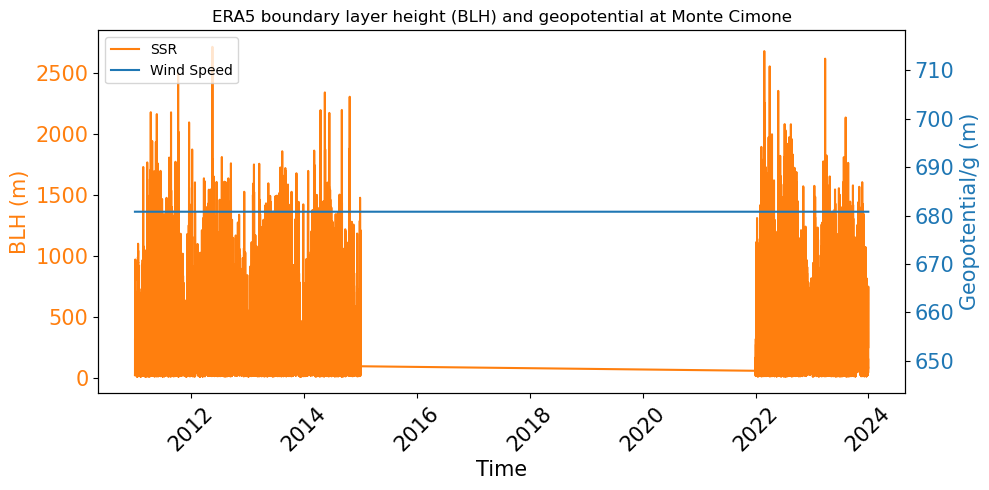

In [57]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot SSR on left y-axis
ax1.set_title("ERA5 boundary layer height (BLH) and geopotential at Monte Cimone")
#ax1.plot(era5.valid_time, era5.ssr[:, -3, 2]/3600, label='SSR', color='tab:orange')
ax1.plot(era5.valid_time, era5.blh[:,0,0], label='SSR', color='tab:orange')
ax1.set_xlabel("Time")
ax1.set_ylabel("BLH (m)", color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.tick_params(axis='x', rotation=45)

# Create second y-axis for wind speed
ax2 = ax1.twinx()
#ax2.plot(era5.valid_time, np.sqrt(np.square(era5.u10[:, -3, 2])+np.square(era5.v10[:, -3, 2])), label='Wind Speed', color='tab:blue')
ax2.plot(era5.valid_time, era5.z[:,0,0]/9.799984, label='Wind Speed', color='tab:blue')
ax2.set_ylabel("Geopotential/g (m)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Optional: Add legends (manually combining them)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


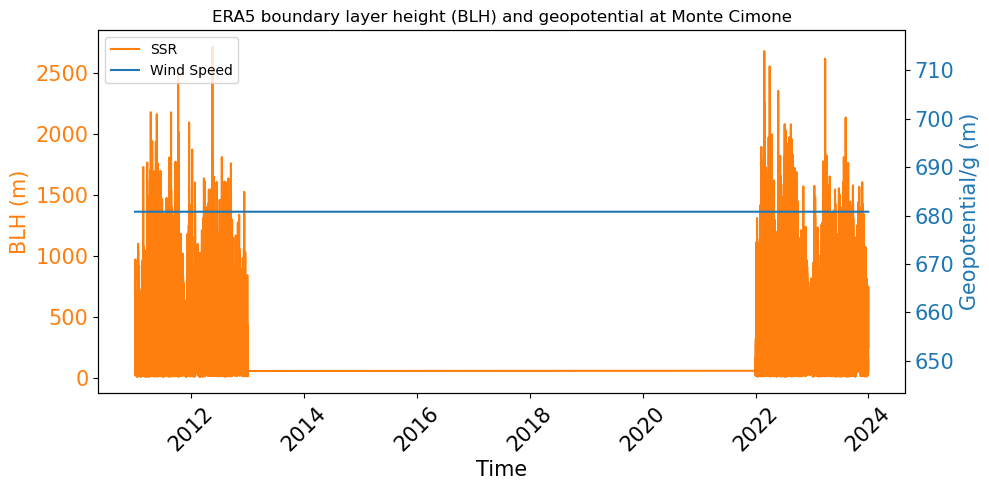

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot SSR on left y-axis
ax1.set_title("ERA5 boundary layer height (BLH) and geopotential at Monte Cimone")
#ax1.plot(era5.valid_time, era5.ssr[:, -3, 2]/3600, label='SSR', color='tab:orange')
ax1.plot(era5.valid_time, era5.blh[:,0,0], label='SSR', color='tab:orange')
ax1.set_xlabel("Time")
ax1.set_ylabel("BLH (m)", color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.tick_params(axis='x', rotation=45)

# Create second y-axis for wind speed
ax2 = ax1.twinx()
#ax2.plot(era5.valid_time, np.sqrt(np.square(era5.u10[:, -3, 2])+np.square(era5.v10[:, -3, 2])), label='Wind Speed', color='tab:blue')
ax2.plot(era5.valid_time, era5.z[:,0,0]/9.799984, label='Wind Speed', color='tab:blue')
ax2.set_ylabel("Geopotential/g (m)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Optional: Add legends (manually combining them)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


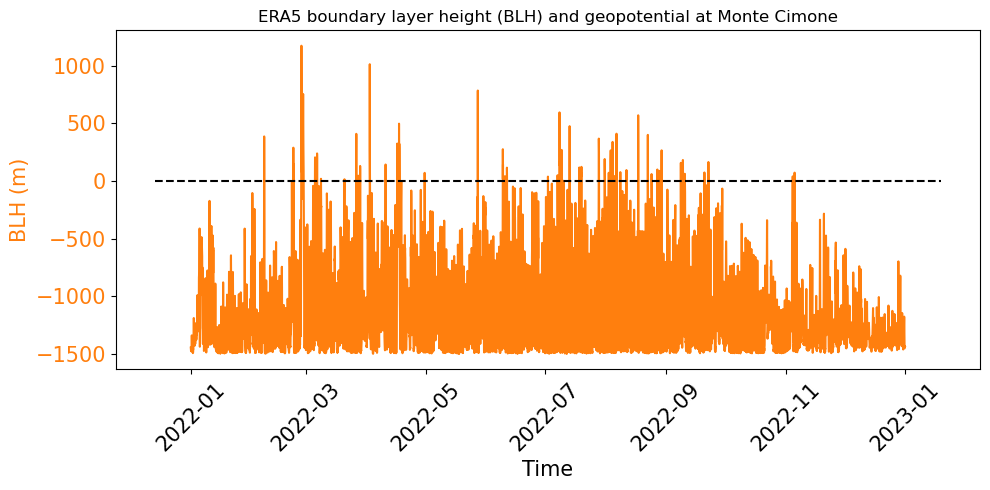

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot SSR on left y-axis
ax1.set_title("ERA5 boundary layer height (BLH) and geopotential at Monte Cimone")
#ax1.plot(era5.valid_time, era5.ssr[:, -3, 2]/3600, label='SSR', color='tab:orange')
ax1.plot(era5.valid_time,era5.blh[:,0,0]-(2165-(era5.z[:,0,0]/9.799984)), label='BLH', color='tab:orange')
# x min and max
xmin, xmax = ax1.get_xlim()

ax1.hlines(y=0, xmin=xmin, xmax=xmax,color='black', linestyle='--', label='BLH = 0')
ax1.set_xlabel("Time")
ax1.set_ylabel("BLH (m)", color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.tick_params(axis='x', rotation=45)



plt.tight_layout()
plt.show()

In [58]:
ft = era5.valid_time.to_pandas().dt.strftime('%Y-%m-%d %H:%M:%S').reset_index(drop=True)
ft_df = pd.DataFrame({'datetime': ft})

# Calculate BLH difference
blh_diff = era5.blh[:,0,0] - (2165 - (era5.z[:,0,0] / 9.799984))

# Add "FT" column: True if blh_diff < 0, else False
ft_df["FT"] = blh_diff < 0

In [13]:
ft_df.to_csv("ft_df_2011_2023.csv", index=False)  # Uncomment to save the

In [11]:
df_obs = pd.read_csv("../Code_c3h8/Processed_data/C3H8_FT.csv",sep=',')
df_obs

,datetime,C3H8_ppb,Label
0,2011-01-27 09:00:00,0.67476,FT
1,2011-01-27 11:00:00,0.71596,FT
2,2011-01-27 13:00:00,0.72782,FT
3,2011-01-27 15:00:00,0.72500,FT
4,2011-01-27 17:00:00,0.74131,FT
...,...,...,...
35774,2023-12-31 02:00:00,0.07656,Other
35775,2023-12-31 04:00:00,0.11815,FT
35776,2023-12-31 05:00:00,0.10664,FT
35777,2023-12-31 07:00:00,0.10012,Other


In [59]:
df_merge = pd.merge(df_obs, ft_df, on='datetime', how='outer')
df_merge.dropna(inplace=True)
df_merge

,datetime,C3H8_ppb,Label,FT
633,2011-01-27 09:00:00,0.67476,FT,True
635,2011-01-27 11:00:00,0.71596,FT,True
637,2011-01-27 13:00:00,0.72782,FT,True
639,2011-01-27 15:00:00,0.72500,FT,True
641,2011-01-27 17:00:00,0.74131,FT,True
...,...,...,...,...
71313,2023-12-31 02:00:00,0.07656,Other,True
71315,2023-12-31 04:00:00,0.11815,FT,True
71316,2023-12-31 05:00:00,0.10664,FT,True
71318,2023-12-31 07:00:00,0.10012,Other,True


In [60]:
def calculate_score(df):
    """
    Calculates a score where:
    - 1 point for each correct FT (Label=FT and FT=True)
    - 1 point for each correct PBL (Label=PBL and FT=False)
    - 0 points for Other labels or incorrect matches
    Returns the score and total possible points
    """
    # Count good matches
    correct_ft = ((df['Label'] == 'FT') & (df['FT'] == True)).sum()
    correct_pbl = ((df['Label'] == 'PBL') & (df['FT'] == False)).sum()
    
    # Calculate totals
    total_possible = (df['Label'].isin(['FT', 'PBL'])).sum()
    score = correct_ft + correct_pbl
    
    return score, total_possible

# Example usage:
score, total = calculate_score(df_merge)
print(f"Score: {score}/{total} ({score/total:.1%} accuracy for FT/PBL classification)")

Score: 2893/3802 (76.1% accuracy for FT/PBL classification)


In [61]:
# Add a scoring column
df_merge['Score'] = 0
df_merge.loc[(df_merge['Label'] == 'FT') & (df_merge['FT']), 'Score'] = 1
df_merge.loc[(df_merge['Label'] == 'PBL') & (~df_merge['FT']), 'Score'] = 1

# Calculate totals
total_ft_pbl = df_merge['Label'].isin(['FT', 'PBL']).sum()
accuracy = df_merge['Score'].sum() / total_ft_pbl
print(f"Classification Accuracy: {accuracy:.1%}")

Classification Accuracy: 98.9%


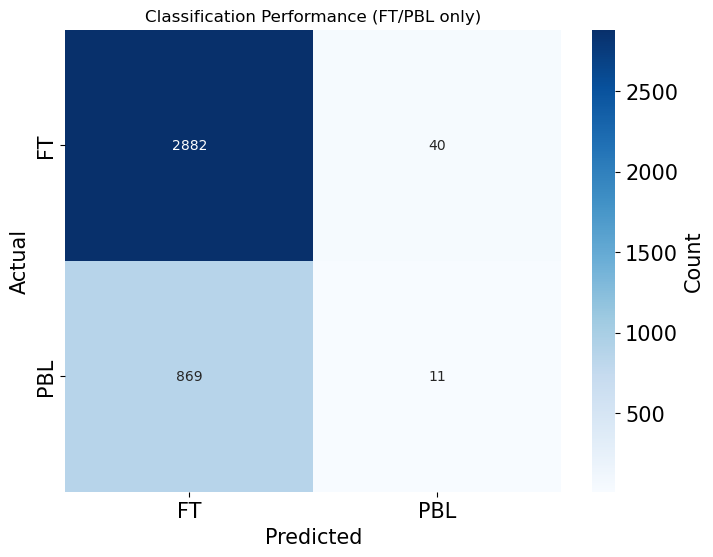

In [62]:
confusion_df = df_merge[df_merge['Label'].isin(['FT', 'PBL'])].copy()
confusion_df['Predicted'] = confusion_df['FT'].map({True: 'FT', False: 'PBL'})

plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(confusion_df['Label'], confusion_df['Predicted']), 
            annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Count'})
plt.title('Classification Performance (FT/PBL only)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Calculate mean C3H8_ppb for Label FT and PBL
mean_c3h8 = df_merge[df_merge['Label'].isin(['FT', 'PBL'])].groupby('Label')['C3H8_ppb'].mean()
print(mean_c3h8)

Label
FT     0.490061
PBL    0.306009
Name: C3H8_ppb, dtype: float64


In [67]:
mean_c3h8 = df_merge.groupby('FT')['C3H8_ppb'].mean()
print(mean_c3h8, "\nMean C3H8_ppb for PBL is {:.2f} percent higher".format((mean_c3h8[0]- mean_c3h8[1])*100/mean_c3h8[1]))

FT
False    0.381928
True     0.378117
Name: C3H8_ppb, dtype: float64 
Mean C3H8_ppb for PBL is 1.01 percent higher


/tmp/ipykernel_26926/1740269489.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(mean_c3h8, "\nMean C3H8_ppb for PBL is {:.2f} percent higher".format((mean_c3h8[0]- mean_c3h8[1])*100/mean_c3h8[1]))


In [66]:
(mean_c3h8[0]- mean_c3h8[1])*100/mean_c3h8[1]  # Difference between PBL and FT means

/tmp/ipykernel_26926/1795727874.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (mean_c3h8[0]- mean_c3h8[1])*100/mean_c3h8[1]  # Difference between PBL and FT means


1.0078022198340404

In [46]:
start_date = '2022-03-11 00:00:00'
end_date = '2022-03-12 23:00:00'
filtered_df = df_merge[(df_merge['datetime'] >= start_date) & (df_merge['datetime'] <= end_date)]
filtered_df
print(filtered_df.groupby('FT')['C3H8_ppb'].mean())
print(filtered_df[filtered_df['Label'].isin(['FT', 'PBL'])].groupby('Label')['C3H8_ppb'].mean())

FT
True    0.940046
Name: C3H8_ppb, dtype: float64
Label
PBL    0.96609
Name: C3H8_ppb, dtype: float64


In [47]:
start_date = '2022-03-18 00:00:00'
end_date = '2022-03-21 23:00:00'
filtered_df = df_merge[(df_merge['datetime'] >= start_date) & (df_merge['datetime'] <= end_date)]
filtered_df
print(filtered_df.groupby('FT')['C3H8_ppb'].mean())
print(filtered_df[filtered_df['Label'].isin(['FT', 'PBL'])].groupby('Label')['C3H8_ppb'].mean())

FT
False    1.01089
True     0.87543
Name: C3H8_ppb, dtype: float64
Label
FT     0.772399
PBL    0.962487
Name: C3H8_ppb, dtype: float64


In [48]:
start_date = '2022-11-29 00:00:00'
end_date = '2022-12-01 23:00:00'
filtered_df = df_merge[(df_merge['datetime'] >= start_date) & (df_merge['datetime'] <= end_date)]
filtered_df
print(filtered_df.groupby('FT')['C3H8_ppb'].mean())
print(filtered_df[filtered_df['Label'].isin(['FT', 'PBL'])].groupby('Label')['C3H8_ppb'].mean())

FT
True    1.061936
Name: C3H8_ppb, dtype: float64
Label
FT    1.111084
Name: C3H8_ppb, dtype: float64


In [49]:
start_date = '2023-02-02 00:00:00'
end_date = '2023-02-05 23:00:00'
filtered_df = df_merge[(df_merge['datetime'] >= start_date) & (df_merge['datetime'] <= end_date)]
filtered_df
print(filtered_df.groupby('FT')['C3H8_ppb'].mean())
print(filtered_df[filtered_df['Label'].isin(['FT', 'PBL'])].groupby('Label')['C3H8_ppb'].mean())

FT
True    1.239261
Name: C3H8_ppb, dtype: float64
Label
FT     1.293063
PBL    1.136225
Name: C3H8_ppb, dtype: float64
